### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`

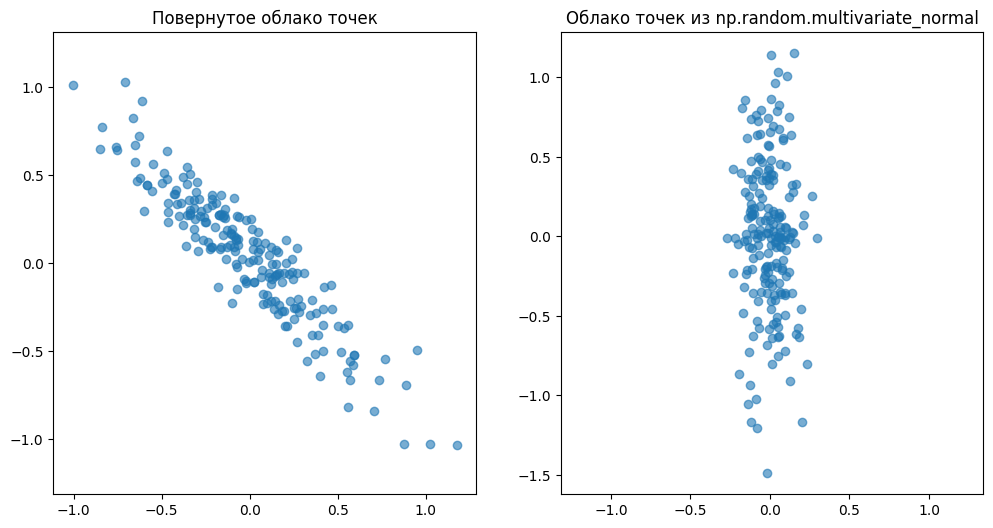

Матрица ковариации:
 [[ 0.14379931 -0.13033303]
 [-0.13033303  0.13764593]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Генерация одномерных распределений
M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

# Шаг 2: Создание матрицы поворота
alpha = np.pi / 4  # 45 градусов
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                            [np.sin(alpha), np.cos(alpha)]])

# Шаг 3: Применение поворота
X_rotated = X @ rotation_matrix.T  # Применяем поворот ко всем точкам

# Шаг 4: Рассчет матрицы ковариации
covariance_matrix = np.cov(X_rotated, rowvar=False)

# Шаг 5: Визуализация полученного облака точек
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Повернутое облако точек')
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.6)
plt.axis('equal')

# Шаг 6: Сравнение с использованием np.random.multivariate_normal
mean = [0, 0]  # Среднее
cov = [[sigma1**2, 0], [0, sigma2**2]]  # Ковариация

Z = np.random.multivariate_normal(mean, cov, M)

plt.subplot(1, 2, 2)
plt.title('Облако точек из np.random.multivariate_normal')
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.6)
plt.axis('equal')

plt.show()

# Печать матрицы ковариации
print("Матрица ковариации:\n", covariance_matrix)

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal`
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

Среднее значение (mu): [1.07282553 2.03502777]
Матрица ковариации (C):
 [[0.60224218 0.19379618]
 [0.19379618 0.5072425 ]]


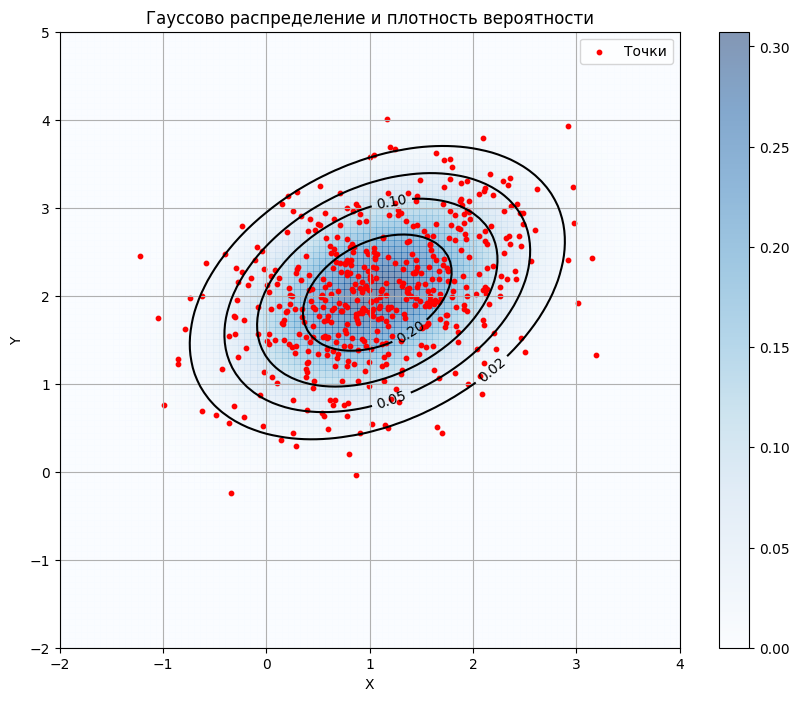

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Генерация случайных точек с гауссовым распределением
num_points = 500
mean = [1, 2]  # Среднее значение
covariance = [[0.6, 0.2], [0.2, 0.5]]  # Матрица ковариации

# Генерация данных
data = np.random.multivariate_normal(mean, covariance, num_points)

# Вычисление среднего и ковариации
mu = np.mean(data, axis=0)
C = np.cov(data, rowvar=False)

print("Среднее значение (mu):", mu)
print("Матрица ковариации (C):\n", C)

# Подготовка сетки для оценки плотности вероятности
xx = np.linspace(-2, 4, 100)
yy = np.linspace(-2, 5, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Создание многомерного нормального распределения с найденными параметрами
m = multivariate_normal(mean=mu, cov=C)
ZZ = m.pdf(pp).reshape(XX.shape)

# Визуализация
plt.figure(figsize=(10, 8))

# Фон с плотностью вероятности
IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='Blues', alpha=0.5)
plt.colorbar(IMG)

# Контуры плотности вероятности
CS = plt.contour(XX, YY, ZZ, levels=[0.02, 0.05, 0.1, 0.2, 0.5], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

# Показ точек
plt.scatter(data[:, 0], data[:, 1], c='red', s=10, label='Точки')

# Настройки графика
plt.title('Гауссово распределение и плотность вероятности')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.show()

### 3. Бинарная классификация

**Задание**
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью логарифмов левой и правой частей уравнения (4) (лучше упростить выражение). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

Средние значения:
mu_0: [1.9922114  3.00329029]
mu_1: [5.02553516 5.03351178]
Ковариации:
C_0:
 [[0.98971776 0.51319828]
 [0.51319828 0.97064051]]
C_1:
 [[ 0.97154862 -0.39965269]
 [-0.39965269  0.86458688]]


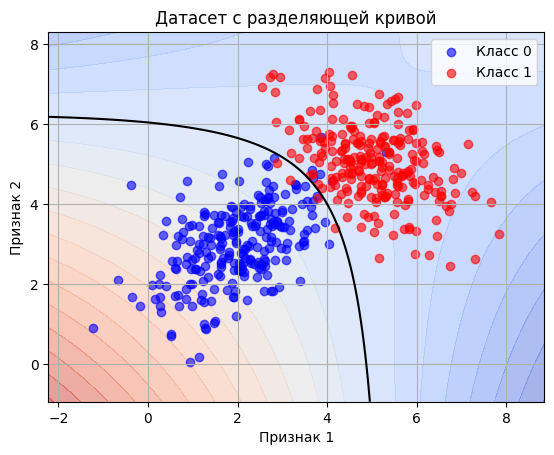

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Шаг 1: Создание случайного датасета
np.random.seed(42)
n_samples = 500
mean_0 = [2, 3]
cov_0 = [[1, 0.5], [0.5, 1]]
mean_1 = [5, 5]
cov_1 = [[1, -0.5], [-0.5, 1]]

class_0 = np.random.multivariate_normal(mean_0, cov_0, n_samples // 2)
class_1 = np.random.multivariate_normal(mean_1, cov_1, n_samples // 2)

data = np.vstack((class_0, class_1))
labels = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

# Шаг 2: Вычисление среднего и матрицы ковариации
mu_0 = np.mean(class_0, axis=0)
C_0 = np.cov(class_0, rowvar=False)
mu_1 = np.mean(class_1, axis=0)
C_1 = np.cov(class_1, rowvar=False)

print("Средние значения:")
print("mu_0:", mu_0)
print("mu_1:", mu_1)
print("Ковариации:")
print("C_0:\n", C_0)
print("C_1:\n", C_1)

# Шаг 3: Визуализация данных и фона
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Шаг 4: Расчет логарифмов вероятностей
def log_probability(x, mean, cov):
    return multivariate_normal.logpdf(x, mean=mean, cov=cov)

log_prob_0 = log_probability(np.dstack((xx, yy)), mu_0, C_0)
log_prob_1 = log_probability(np.dstack((xx, yy)), mu_1, C_1)
log_ratio = log_prob_0 + np.log(0.5) - (log_prob_1 + np.log(0.5))  # p(y=0) = p(y=1) = 0.5

# Визуализация фона
plt.contourf(xx, yy, log_ratio, levels=20, cmap='coolwarm', alpha=0.5)

# Построение точек
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Класс 0', alpha=0.6)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Класс 1', alpha=0.6)

# Добавление разделяющей кривой
plt.contour(xx, yy, log_ratio, levels=[0], colors='black')

plt.title('Датасет с разделяющей кривой')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid()
plt.show()

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту.
Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [39]:
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        self.mu_ = None
        self.cov_ = None
        self.priors_ = None
        self.w_ = None
        self.b_ = None

    def fit(self, X, y):
        classes = np.unique(y)
        self.mu_ = np.array([np.mean(X[y == c], axis=0) for c in classes])
        self.cov_ = np.cov(X.T)
        self.priors_ = np.array([np.sum(y == c) / len(y) for c in classes])

        # Линейный дискриминант
        self.w_ = np.linalg.inv(self.cov_).dot(self.mu_[0] - self.mu_[1])
        self.b_ = -0.5 * (self.mu_[0].T.dot(np.linalg.inv(self.cov_)).dot(self.mu_[0]) -
                          self.mu_[1].T.dot(np.linalg.inv(self.cov_)).dot(self.mu_[1])) + np.log(self.priors_[0] / self.priors_[1])

    def predict(self, X):
        return (X.dot(self.w_) + self.b_ > 0).astype(int)


np.random.seed(0)
X = np.concatenate([np.random.randn(50, 2) - 1, np.random.randn(50, 2) + 1])
y = np.array([0]*50 + [1]*50)
lda = myLDA()
lda.fit(X, y)
predictions = lda.predict(X)
accuracy = np.mean(predictions == y)
print(f"Точность классификатора: {accuracy:.2f}")

Точность классификатора: 0.06


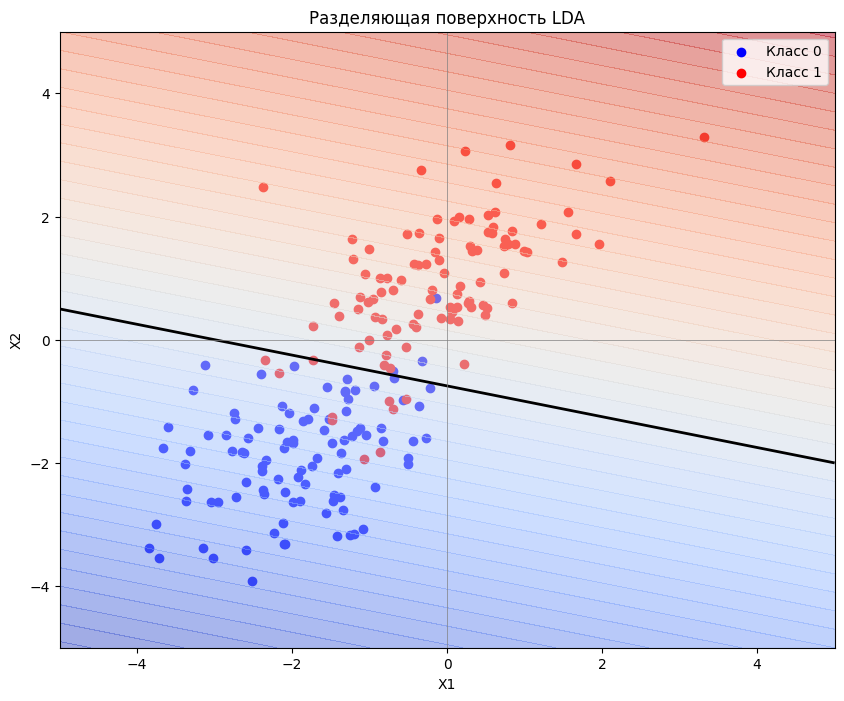

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Параметры
np.random.seed(42)
mu_0 = np.array([-2, -2])  # Среднее для первого класса
mu_1 = np.array([0, 1])     # Среднее для второго класса
C = np.array([[1, 0.5], [0.5, 1]])  # Общая матрица ковариации

# Генерация данных
N = 100
X_0 = np.random.multivariate_normal(mu_0, C, N)
X_1 = np.random.multivariate_normal(mu_1, C, N)

# Определяем сетку для визуализации
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Вычисление вероятностей
log_prob_0 = multivariate_normal.logpdf(grid, mean=mu_0, cov=C)
log_prob_1 = multivariate_normal.logpdf(grid, mean=mu_1, cov=C)

# Вычисление разности логарифмов
log_diff = log_prob_1 - log_prob_0

# Построение графика
plt.figure(figsize=(10, 8))
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Класс 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Класс 1')

# Фон
plt.contourf(xx, yy, log_diff.reshape(xx.shape), levels=50, cmap='coolwarm', alpha=0.5)

# Разделяющая кривая
plt.contour(xx, yy, log_diff.reshape(xx.shape), levels=[0], colors='black', linewidths=2)

plt.title('Разделяющая поверхность LDA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.legend()
plt.show()

### 5. Наивный байесовый классификатор (NaiveBayes)
**Задание**
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [23]:
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.classes_ = None
        self.means_ = None
        self.variances_ = None
        self.priors_ = None

    def fit(self, X, y):
        #Обучаем модель на тренировочных данных X и соответствующих метках y.
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape
        self.means_ = np.zeros((len(self.classes_), n_features))
        self.variances_ = np.zeros((len(self.classes_), n_features))
        self.priors_ = np.zeros(len(self.classes_))

        for idx, cls in enumerate(self.classes_):
            # Получаем только данные для текущего класса
            X_cls = X[y == cls]
            self.means_[idx, :] = X_cls.mean(axis=0)
            self.variances_[idx, :] = X_cls.var(axis=0)
            self.priors_[idx] = X_cls.shape[0] / n_samples

    def predict(self, X):

        #Предсказываем классы для новых данных X.
        n_samples = X.shape[0]
        # Вычисляем логарифмы вероятностей
        log_probs = np.zeros((n_samples, len(self.classes_)))

        for idx, cls in enumerate(self.classes_):
            # Используем гауссовскую формулу распределения для вычисления вероятности
            mean = self.means_[idx]
            var = self.variances_[idx]
            prior = np.log(self.priors_[idx])

            # Предположение, что переменные независимы
            log_prob = -0.5 * np.sum(np.log(2 * np.pi * var)) - \
                        np.sum((X - mean) ** 2 / (2 * var), axis=1)
            log_probs[:, idx] = log_prob + prior

        # Предсказываем класс с максимальной вероятностью
        return self.classes_[np.argmax(log_probs, axis=1)]
# Импортируем библиотеки для создания примеров
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Генерация тестового набора данных
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=3)

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение наивного байесовского классификатора
model = myNB()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Проверка точности
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 76.00%


### 6. Сравнение двух алгоритмов: LDA и NB
Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Генерация датасета для бинарной классификации
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=10, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение и предсказание с помощью LDA
lda_classifier = myLDA()
lda_classifier.fit(X_train, y_train)
y_pred_lda = lda_classifier.predict(X_test)

# Обучение и предсказание с помощью Naive Bayes
nb_classifier = myNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Вычисление метрик
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Вывод результатов
print("LDA Classifier:")
print(f"Точность: {accuracy_lda*100:.2f}%, Precision: {precision_lda*100:.2f}%, Полнота: {recall_lda*100:.2f}%")

print("Naive Bayes Classifier:")
print(f"Точность: {accuracy_nb*100:.2f}%, Precision: {precision_nb*100:.2f}%, Полнота: {recall_nb*100:.2f}%")

LDA Classifier:
Точность: 16.50%, Precision: 9.20%, Полнота: 8.33%
Naive Bayes Classifier:
Точность: 86.50%, Precision: 85.57%, Полнота: 86.46%


**Выводы:**

Точность показывает, сколько из всех предсказанных значений совпали с истинными. Это базовая метрика для оценки модели. Высокая точность означает хорошую работу модели.
Точность(Precision) показывает, какую долю правильно предсказанных положительных классов составляют все предсказанные положительные классы. Высокая точность важна, когда важно минимизировать количество ложноположительных срабатываний.
Полнота (Recall) отображает, какую долю верных положительных результатов удалось уловить model. Это важно в задачах, где критично выявить как можно больше истинных положительных примеров.
